In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [26]:
num_of_clusters=2
dataset = pd.read_csv("cm_dataset_2 - cm_dataset.csv",header=None)
dataset=np.array(dataset)
error_for_5_intialisations =[]

# KMEANS

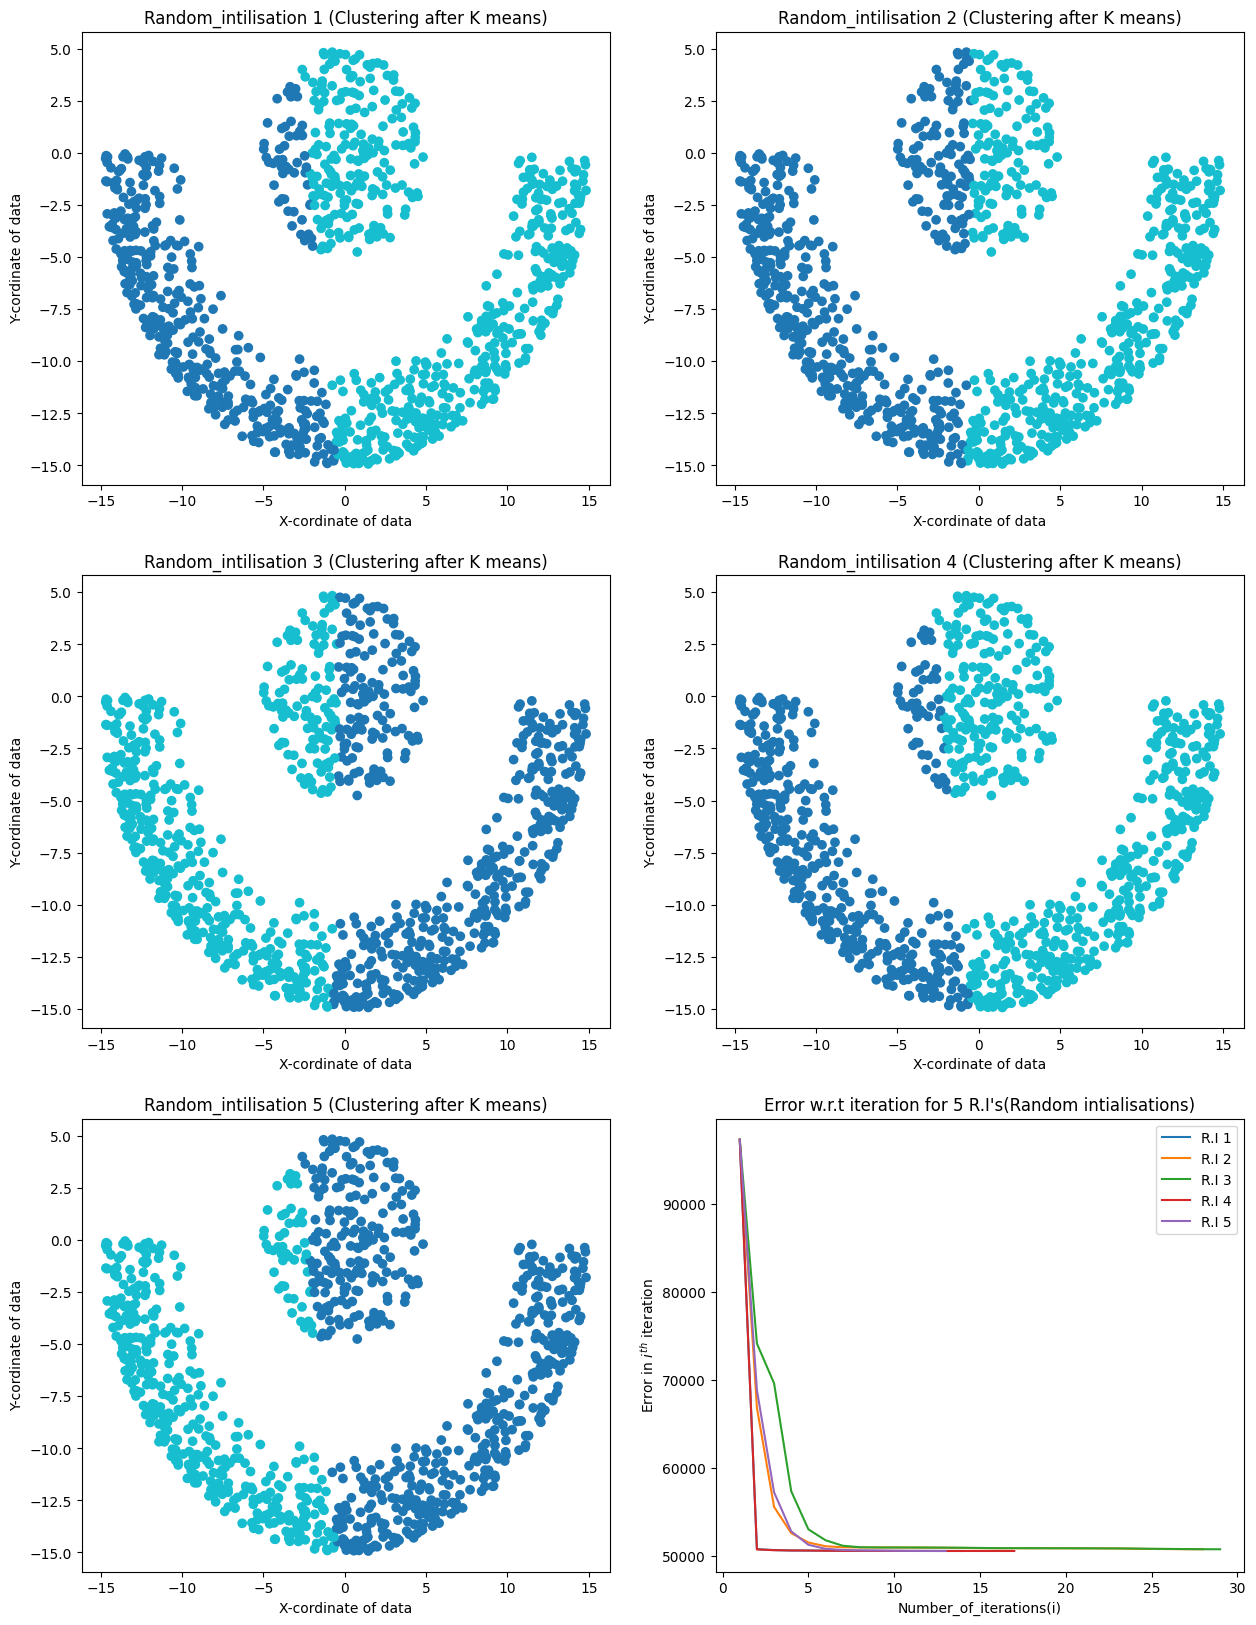

In [27]:
fig,axs=plt.subplots(3,2,figsize=(15,20))
for p in range(5) :
    a,b=divmod(p,2)
    error_function=[]
    current_cluster_assignement= np.zeros((dataset.shape[0])).astype(int)
    Next_cluster_assignement= np.zeros((dataset.shape[0])).astype(int)
    current_cluster_assignement=np.random.randint(0,num_of_clusters,dataset.shape[0])


    mean_of_clusters=np.zeros((num_of_clusters,2))
    for i in range(num_of_clusters) :
        temp=0
        for j in range(dataset.shape[0]) :
         if current_cluster_assignement[j]==i :
            temp+=1
            mean_of_clusters[i]+=dataset[j]
        mean_of_clusters[i]/= temp    


    while True :

        error_temp =0
        
        for i in range(dataset.shape[0]) :
         t=current_cluster_assignement[i]

         error_temp+=((dataset[i][0]-mean_of_clusters[t][0])**2)+((dataset[i][1]-mean_of_clusters[t][1])**2)

            
         Next_cluster_assignement[i]=np.argmin([((dataset[i][0]-mean_of_clusters[j][0])**2)+((dataset[i][1]-mean_of_clusters[j][1])**2) for j in range(num_of_clusters)])

        error_function.append(error_temp)

        if  np.array_equal(Next_cluster_assignement,current_cluster_assignement):
         break
    
        current_cluster_assignement = Next_cluster_assignement.copy()
        mean_of_clusters=np.zeros((num_of_clusters,2))
        for i in range(num_of_clusters) :
            temp=0
            for j in range(dataset.shape[0]) :
                if current_cluster_assignement[j]==i :
                 temp+=1
                 mean_of_clusters[i]+=dataset[j]
            mean_of_clusters[i]/= temp
    colors =plt.cm.tab10(np.linspace(0,1,num_of_clusters))
    error_for_5_intialisations.append(error_function)
    color_of_each_cluster=colors[current_cluster_assignement]
    axs[a,b].scatter(dataset[:,0],dataset[:,1],c=color_of_each_cluster)
    axs[a,b].set_xlabel("X-cordinate of data")
    axs[a,b].set_ylabel("Y-cordinate of data")
    axs[a,b].set_title("Random_intilisation "+str(p+1)+" (Clustering after K means)")
    x=np.arange(len(error_for_5_intialisations[p]))+1
    axs[2,1].plot(x,error_for_5_intialisations[p],label="R.I "+str(p+1))
    axs[2,1].set_title("Error w.r.t iteration for 5 R.I's(Random intialisations)")

axs[2,1].set_ylabel("Error in $i^{th}$ iteration")
axs[2,1].set_xlabel("Number_of_iterations(i)")
axs[2,1].legend()

plt.show()